## Connect Intensive - Machine Learning Nanodegree

## Week 4. Supervised Learning  - Linear Regression  

## Objectives    

- Learn basics of linear regression
- Numpy
- Feature scaling
- Identifying multi-colinearity

Let us start by importing the libraries

In [152]:
try:
    import numpy as np
    print("Successfully imported numpy! Version {}".format(np.version.version))
except ImportError:
    print("Could not import numpy!")
    
try:
    import pandas as pd
    print("Successfully imported pandas! Version {}".format(pd.__version__))
except ImportError:
    print("Could not import pandas!")
    
try:
    import matplotlib
    import matplotlib.pyplot as plt
    print("Successfully imported matplotlib! Version {}".format(matplotlib.__version__))
except ImportError:
    print("Could not import matplotlib!")

try:
    import seaborn as sns
    print("Successfully imported seaborn! Version {}".format(sns.__version__))
except ImportError:
    print("Could not import seaborn!")
    

from IPython.display import display
%matplotlib inline

Successfully imported numpy! Version 1.14.1
Successfully imported pandas! Version 0.22.0
Successfully imported matplotlib! Version 2.1.2
Successfully imported seaborn! Version 0.8.1


The **first** exercise should be familiar by now. We will import a regressor and a metric, then train some data to a linear model.
$$ y = w_0 + w_1\cdot x $$
The data will be generated so we'll know what the answer should be. The **second** part will be calculating the slope ($w_1$) and intercept ($w_0$) using the exact formula. The notebook will guide you through it. 
The **third** part will be trying out _gradient-descent_ manually so you get a sense of what goes on in the algorithms.

In [153]:
def quick_plot(X, Y, model):
    plt.figure(2)
    plt.scatter(X, Y, c="blue", alpha=0.3, s=50.0 )
    plt.plot(X, model, c="gray")
    plt.ylim(Y.min(), Y.max())
    plt.show()
    
X = np.linspace(0, 10, 100)
def f_line(m, b, X):
    return X*m + b

This is from our notebook from session 2 -- I am generating some noisy data based on a straight line

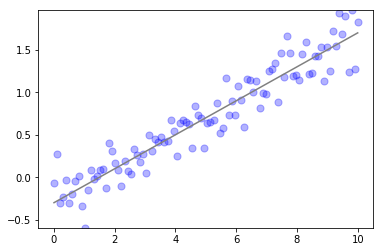

[]


In [154]:
# Generate a line with slope m and intercept b (keep them between -1.0 and 1.0)
Y=f_line(m=0.2, b=-0.3, X=X);
# Assign a value to sigma (between 0.1 and 5.0)
sigma = 0.2

# r is a vector of random numbers drawn from a normal distribution centered on 0, with a standard deviation of sigma.
# quick_plot overlays the "observed" noisy data (Y+random values) and the underlying true value (Y).
r =  np.random.normal(0, sigma, len(X))
observed_data = Y + r
quick_plot(X, observed_data, Y)

#print X[:80]
#print X[80:]
#print X
#print observed_data[:80]
#print observed_data[80:]
#print Y[:80]
print Y[len(Y):]

#### Linear Regression using `sklearn`

** TO DO:**

Use the `LinearRegression` class from the `sklearn.linear_model` package to calculate the slope and intercept of the "best-fit line" through our generated data.

In [155]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression() # TODO

#TO DO - Fit the regressor to our data
# Split the data into training/testing sets
X_train = X[:80]
X_test = X[80:]
Y_train = observed_data[:80]
Y_test = observed_data[80:]

# Split the targets into training/testing sets
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

y_train = y_train.reshape(-1, 1) 
y_test = y_test.reshape(-1, 1) 

#print X_train
lreg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [156]:
#The results of the fit are available through the `coef_` attribute after the model has been fit
print("Slope is {:.3f}, and intercept is {:.3f}".format(float(lreg.coef_[0]), float(lreg.intercept_)))

Slope is 0.200, and intercept is -0.300


The exact formula for the slope and intercept of a linear regression to this data is:
$$ \large w_1 =  {\Sigma (X-\bar{X})\cdot(Y - \bar{Y}) \over \Sigma (X - \bar{X})^2  }  $$

$$ \large w_0 =  \bar{Y}  - w_1 \cdot \bar{X} $$

Each of the sums are over all data points, i.e. $\Sigma_{i=1}^N$. $\bar{X}$ and $\bar{Y}$ are the average values of $X$ and $Y$.

**TO DO:**

In [157]:
# The goal here is to calculate the slope and intercept using these formulas and numpy functions you are familiar with
# Hints: 1. Calcuate the mean of X and Y
#        2. Calculate X - X.mean
#        3. Calculate the slope (w1). The division is over scalar values so you need to sum over all data points before dividing 

#from scipy import stats
#slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

#TODO - implement this
slope_all = np.sum((X-X.mean())*((observed_data-observed_data.mean())))/np.sum((X-X.mean())**2)
slope_train = np.sum((X_train-X_train.mean())*((y_train-y_train.mean())))/np.sum((X_train-X_train.mean())**2)

# Calulate the intercept.
intercept_all = observed_data.mean()-slope_all*X.mean() # TO DO  - implement this
intercept_train = y_train.mean()-slope_train*X_train.mean()

print("Slope using all data is {:.3f}, and intercept is {:.3f}".format(slope_all, intercept_all))
print("Slope using train data is {:.3f}, and intercept is {:.3f}".format(slope_train, intercept_train))

Slope using all data is 0.197, and intercept is -0.278
Slope using train data is 0.200, and intercept is -0.300


For the third part, we are going to do a walk-through of gradient descent in one dimension. The method works because the error function is *convex*, i.e., looks bowl-shaped and calculus tells us that the quickest way to get to the bottom is following the path of steepest descent. `Steepest descent` is basically another term for `direction in which the change in error is largest`. In the algorithms we will use, the "slope" (or gradient in multi-dimensions) isn't calculated exactly this way, but the principle is similar.

For this part to work without errors, the arguments should have the correct shape. X and Y should be numpy array of shape (100, 2) and (100, 1) respectively. W should be a numpy array of shape (1, 2). 

In [190]:
# Calculate mean squared error 
# Y - np.array(N, 1) - ground truth
# Y_pred - np.array(N, 1) - predictions
def mse(Y, Y_pred):
    return np.sum((Y-Y_pred)**2)/Y.shape[0]

# A very simple gradient function 
#     Calculate the gradient by comparing the difference in MSE for small 
#      changes in the two components of W
def get_gradient(X, Y, W):
    MSE = mse(Y, np.dot(X, W))
    step = 1.0e-5
    W_test = W.copy()
    W_test = W_test + np.array([step, 0]).reshape(2, 1)
    delta0 = (MSE - mse(Y, np.dot(X, W_test)))/step
    W_test = W_test + np.array([-step, step]).reshape(2, 1)
    delta1 = (MSE - mse(Y, np.dot(X, W_test)))/step
    return np.array([delta0, delta1])

def update_weights(W, gradient, lrate=0.001):
    return W + (gradient * lrate).reshape(2, 1)

Lets set up the numpy arrays we will need for this exercise. 
We will start with a guess for the slope and intercept as weights. Notice that the way I have defined X_train, weights[0][0] will be the intercept and weights[1][0] will be the slope.

In [194]:
X_train = np.ones(200).reshape(100,2)
X_train[:,1] = X
X_train = X_train.reshape(100, 2)

weights = np.array([1.0, 0.5]).reshape(2, 1)
Y=Y.reshape(100,1)

**TO DO:** The next step is to choose a `learning rate` (lrate). Choosing this is very important in getting good results. For this part of the exercise, try three different values of lrate and run the cell below repeatedly to see if you can get the slope and intercept close to the values you expect. Write down what you observe for each lrate value you tried below, along with approximately how many iterations it took to reach a value close enough to satisfy you.

If you run into trouble like the values not getting better, reset the problem by running the cell above again.

_HINT:_ Small `lrate` will take a long time to converge and large `lrate` will not converge at all.

In [197]:
lrate = 0.001
for i in range(10000):
    grad = get_gradient(X_train, Y, weights)
    delta = update_weights(weights, grad, lrate)
    weights = weights + (grad*lrate).reshape(2,1)
print "MSE = {:.5f}, Slope = {:.3f} and intercept = {:.3f}"\
        .format(mse(np.dot(X_train, weights), Y), weights[1][0], weights[0][0])

MSE = 0.00000, Slope = 0.200 and intercept = -0.297


**Answer:**



In [ ]:
lrate = 0.02 / iteration = 100
MSE = 0.05197, Slope = 0.132 and intercept = 0.153

lrate = 0.03 / iteration = 100
MSE = 0.00259, Slope = 0.185 and intercept = -0.199

lrate = 0.04 / iteration = 100
MSE = 1359741975542592482312192.00000, Slope = -207334769957.668 and intercept = 39540911018.501

lrate = 0.001 / iteration = 100
MSE = 0.04706, Slope = 0.135 and intercept = 0.131

lrate = 0.001 / iteration = 10000
MSE = 0.00000, Slope = 0.200 and intercept = -0.297
